In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
cast = pd.read_csv(r"D:\cast.csv")
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3311642,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3311643,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3311644,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3311645,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# Q1 Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [2]:
A = cast[(cast.character == 'Superman') | (cast.character == 'Batman')].groupby('year').character.value_counts().unstack().fillna(0)
A[A.Superman > A.Batman].Superman.count()

12

# Q2 How many years have been "Batman years", with more Batman characters than Superman characters?

In [3]:
A = cast[(cast.character == 'Superman') | (cast.character == 'Batman')].groupby('year').character.value_counts().unstack().fillna(0)
A[A.Superman < A.Batman].Superman.count()

24

# Q3 Plot the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year,type'>

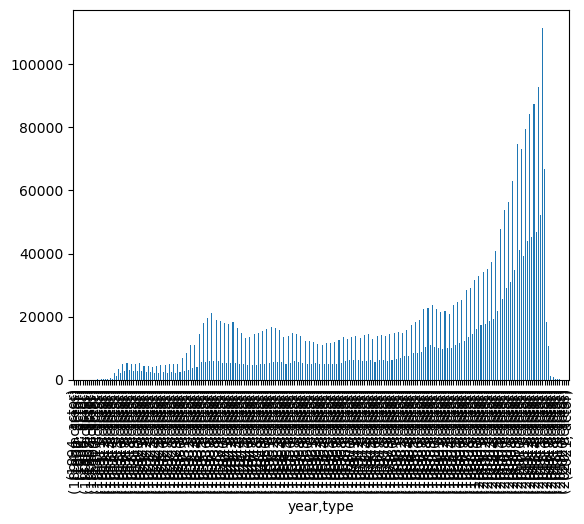

In [4]:
cast.groupby(["year","type"]).type.count().plot.bar()

# Q4 Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<AxesSubplot:xlabel='year,type'>

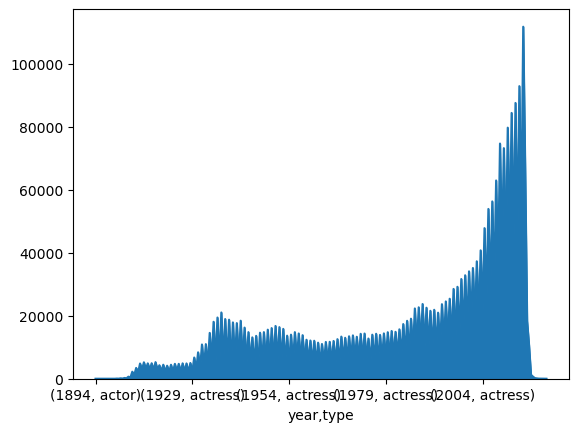

In [5]:
cast.groupby(["year","type"]).type.count().plot.area()

# Q5 Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year'>

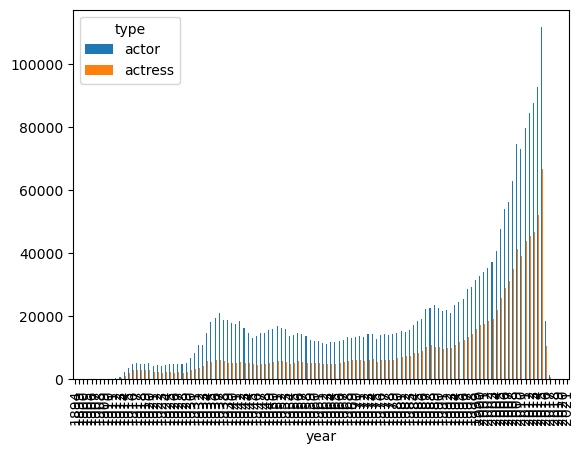

In [13]:
cast[(cast.type == "actor") | (cast.type == "actress")].groupby("year").type.value_counts().unstack().fillna(0).plot.bar()


# Q6 Plot the fraction of roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

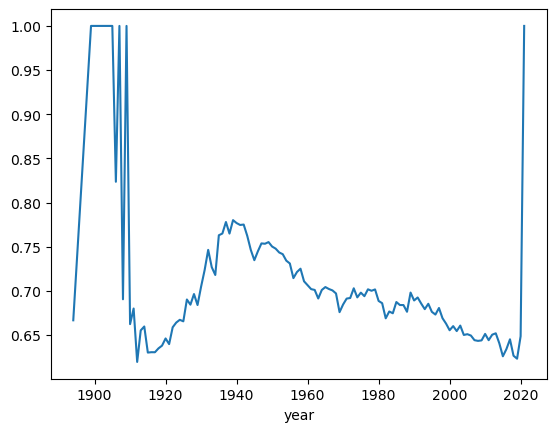

In [3]:
a=cast.groupby('year').type.value_counts().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=(a['actor']/total_roles)
frac_roles.plot.line()

# Q7 Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

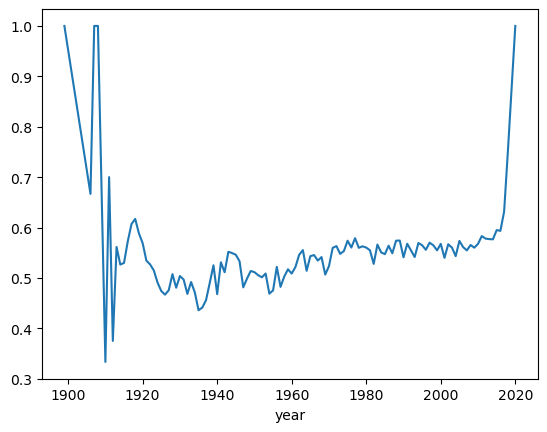

In [4]:
b=cast[(cast.n==2)].groupby(['year','type']).character.nunique().unstack().fillna(0)
total_roles=b['actor']+b['actress']
frac_roles=b['actor']/total_roles
frac_roles.plot()

# Q8 Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<AxesSubplot:xlabel='year'>

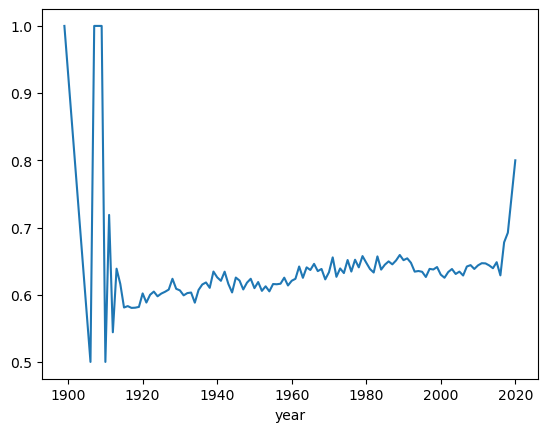

In [5]:
a=cast[(cast.n<4)].groupby(['year','type']).character.nunique().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=a['actor']/total_roles
frac_roles.plot.line()